In [ ]:
Topics Discussed: Multicollinearity,Regularizaton,l1,l2,elastic net,polynomial regression

# Multicollinearity

Multicollinearity occurs when two or more independent variables (input features) in a dataset are highly correlated with each other.

Why is Multicollinearity a Problem?

When we build models like Linear Regression:

The model gets confused

It cannot decide which variable is actually influencing the output

Coefficients become unstable and unreliable

 # Examples:

Example 1: Salary Prediction 
Features:

years_of_experience

age

In many cases:

As age increases, experience also increases

These two are strongly correlated

Multicollinearity may exist

 Example2:Student Performance 
Features:

total_marks

average_marks



average_marks = total_marks / number_of_subjects


Both columns depend on each other

Result:

Strong correlation

Multicollinearity exists

 # How to Detect Multicollinearity



Correlation value close to +1 or -1

High Variance Inflation Factor (VIF)



 # How to Handle Multicollinearity 

 

Remove one of the correlated features

Combine features

Use regularization (Ridge/Lasso)

 # Bias–Variance Trade-off

In [ ]:
# The bias–variance trade-off describes the balance between:

# Bias: error due to overly simple assumptions

# Variance: error due to too much sensitivity to the data

# A good model should have low bias and low variance, but improving one usually worsens the other.

# BIAS (Underfitting)


What is Bias?

Model is too simple

Cannot capture patterns in data

Performs poorly on training and test data

Example : Predicting House Price Using Only One Feature

Using only:

house_size

Ignoring:

location

number of rooms

age of house

 Model is too simple
 High Bias

 # VARIANCE (Overfitting)


What is Variance?

Model is too complex

Learns noise instead of pattern

Performs well on training but poorly on test data

Example 1: Very High-Degree Polynomial

Fitting a 10th-degree polynomial to small data.

Result:

Perfect fit on training data

Very poor generalization

High Variance

# How to Handle Bias–Variance Trade-off

# Regularization

Regularization is a technique used to reduce overfitting by penalizing large model coefficients, so the model becomes simpler and generalizes better.

 #Why Do We Need Regularization?

In [ ]:

problems
# Complex models → High variance

# Model fits noise, not pattern

# Performs poorly on new data 

 to over come this we need  Regularization reduces variance and improves generalization

 # Types of Regularization


1:L1 Regularization (Lasso)
2:L2 Regularization (Ridge)

# Lasso regression

1:#### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

Loss=∑(y−y^​)2+λ∑∣wi​∣

Where, λ is the shrinkage factor.
    Where

 wi= model weights (coefficients))

Example:

predicting the house price( remove the feature (house color) completely to become the zero)

What Lasso does:

Removes useless features completely

Sets some coefficients to zero

Used when many irrelevant features





# Ridge Regression

#2:Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

Loss=∑(y−y^​)2+λ∑wi2​

What Ridge does

Reduces the impact of less important features

Does NOT remove features

All features stay in the model
 Used when all features matter


➡️ Adds square of weights

# Difference between  Lasso and ridge?

Ridge regression reduces coefficient magnitude but keeps all features, while Lasso can shrink coefficients to zero and performs feature selection.”

# Elastic Net

##### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).

 # Polynomial Regression

Polynomial Regression is a type of regression where the relationship between the independent variable 

x and the dependent variable 

y is modeled as an nth-degree polynomial instead of a straight line.

It is an extension of Linear Regression.

Useful when data shows a curved relationship.

For a degree 2 polynomial (quadratic):

y=w0​+w1​x+w2​x2+ϵ

For degree n:

y=w0​+w1​x+w2​x2+w3​x3+⋯+wn​xn+ϵ




Linear Regression → tries to fit a straight line.
Polynomial Regression → tries to fit a curve that better follows the data.

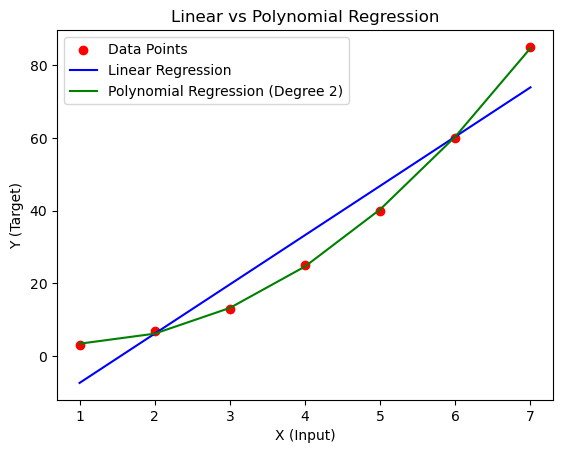

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# -----------------------------
# Sample Data
# -----------------------------
X = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([3, 7, 13, 25, 40, 60, 85])

# -----------------------------
# Linear Regression
# -----------------------------
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)

# -----------------------------
# Polynomial Regression (Degree 2)
# -----------------------------
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

# -----------------------------
# Plotting
# -----------------------------
plt.scatter(X, y, color='red', label='Data Points')

# Linear Regression line
plt.plot(X, y_lin_pred, color='blue', label='Linear Regression')

# Polynomial Regression curve
plt.plot(X, y_poly_pred, color='green', label='Polynomial Regression (Degree 2)')

plt.title("Linear vs Polynomial Regression")
plt.xlabel("X (Input)")
plt.ylabel("Y (Target)")
plt.legend()
plt.show()
